Installing necessary packages

In [1]:
#!pip install ipynb

Importing necessary libraries

In [2]:
import cv2
import numpy as np
from sklearn.feature_extraction import image
from skimage import data
from matplotlib import pyplot as plt
from skimage import color
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction import image
from ipynb.fs.full.functions import *
import sys
import time
import argparse, sys

In [3]:
# Handling project arguments
args = handle_args()

In [4]:
# Start a timer for calculating project process time
start_time = time.process_time()

In [5]:
print('processing', args.image_name)

processing p001


In [6]:
# getting ground truth image
groundtruth = get_groundtruth(args.image_name)

In [7]:
# getting the source image and convert it one dimention
source = get_source(args.image_name)
source = get_one_dim(source[:,:,:3], True)
source.shape

(36960, 1, 3)

In [8]:
# converting the source image to gray color image as one and two dimentions
source_gray = color.rgb2gray(source)
source_gray_2d = color.rgb2gray(get_source(args.image_name))

In [9]:
# getting the target image and convert it one dimention
target = get_target(args.image_name)
target = color.rgb2gray(target)
target = get_one_dim(target)

In [10]:
# sepereting source image into red, green and blue channels
source_red_channel = source[:, :, 0]
source_green_channel = source[:, :, 1]
source_blue_channel = source[:, :, 2]

In [11]:
# create a dataframe for train and test data
X = pd.DataFrame(source_gray)
X_test = pd.DataFrame(target)
X = X.rename(columns = {0:"Gray"})
X_test = X_test.rename(columns = {0: 'Gray'})

In [12]:
X

,Gray
0,0.787664
1,0.787381
2,0.784576
3,0.784576
4,0.784576
...,...
36955,0.181227
36956,0.149289
36957,0.203908
36958,0.155725


In [13]:
X_test

,Gray
0,0.274510
1,0.278431
2,0.290196
3,0.294118
4,0.298039
...,...
41745,0.054902
41746,0.066667
41747,0.094118
41748,0.105882


In [14]:
# getting the Source and Target images with openCV for using OpenCV filters
source_opencv = get_source_opencv(args.image_name)
source_gray_2d_opencv = cv2.cvtColor(source_opencv, cv2.COLOR_BGR2GRAY)
target_opencv = get_target_opencv(args.image_name)
target_opencv_gray = cv2.cvtColor(target_opencv, cv2.COLOR_BGR2GRAY)

In [15]:
# using Haris Corner Detection algorithm
if args.use_haris_corner:
    train, test = get_feature(get_haris_corner, args.image_name, X, X_test)
    X['Haris_corner[1]'] = train[:, 1]
    X_test['Haris_corner[1]'] = test[:, 1]

In [16]:
# using FAST algorithm for corner detection
if args.use_fast_feature:
    train, test = get_feature(get_fast_feature, args.image_name, X, X_test)
    X['Fast[0]'] = train[:, 0]
    X['Fast[1]'] = train[:, 1]
    X['Fast[2]'] = train[:, 2]
    X['Fast[3]'] = train[:, 3]
    X_test['Fast[0]'] = test[:, 0]
    X_test['Fast[1]'] = test[:, 1]
    X_test['Fast[2]'] = test[:, 2]
    X_test['Fast[3]'] = test[:, 3]

In [17]:
# using ORB (Oriented FAST and Rotated Brief) algorithm
if args.use_orb_feature:          
    train, test = get_feature(get_orb_feature, args.image_name, X, X_test)
    X['Orb[0]'] = train[:, 0]
    X['Orb[1]'] = train[:, 1]
    X['Orb[2]'] = train[:, 2]
    X['Orb[3]'] = train[:, 3]
    X_test['Orb[0]'] = test[:, 0]
    X_test['Orb[1]'] = test[:, 1]
    X_test['Orb[2]'] = test[:, 2]
    X_test['Orb[3]'] = test[:, 3]

In [18]:
# using edge detection algorithm with canny
if args.use_edge_features:
    train = get_edge_feature(source_gray_2d)
    test = get_edge_feature(convert_float(get_target(args.image_name)))
    X['Edge'] = train
    X_test['Edge'] = test

In [19]:
# using neighboorhood algorithm for relation of pixels of their neighbor pixels
if args.use_neighborhood_features:
    gray = cv2.cvtColor(get_source_opencv(args.image_name), cv2.COLOR_BGR2GRAY)
    train = get_neighborhood_feature(gray, args.neigh_patch_size)
    target_gray = color.rgb2gray(get_target(args.image_name))
    test = get_neighborhood_feature(target_gray, args.neigh_patch_size)
    X['Neighborhood'] = neigh
    X_test['Neighborhood'] = test

In [20]:
# using sum features for sum value of pixels of their neighbor pixels
if args.use_sum_features:
    train = get_sum_feature(source_gray_2d, args.sum_patch_size)
    test = get_sum_feature(convert_float(get_target(args.image_name)), args.sum_patch_size)
    X['Sum'] = train
    X_test['Sum'] = test

In [21]:
# using sum features for average value of pixels of their neighbor pixels
if args.use_avg_features:
    train = get_avg_feature(source_gray_2d, args.avg_patch_size)
    test = get_avg_feature(convert_float(get_target(args.image_name)), args.avg_patch_size)
    X['Avg'] = train
    X_test['Avg'] = test

In [22]:
# using sum features for standard deviation value of pixels of their neighbor pixels
if args.use_sd_features:
    train = get_sd_feature(source_gray_2d, args.sum_patch_size)
    test = get_sd_feature(convert_float(get_target(args.image_name)), args.sum_patch_size)
    X['Sd'] = train
    X_test['Sd'] = test

In [23]:
# using distance features for each pixels distance to top,bottom,right and left distance
if args.use_distance_features:
    up_train, down_train, left_train, right_train = get_distance_feature(source_gray_2d)
    up_test, down_test, left_test, right_test = get_distance_feature(get_target(args.image_name))
    X['Distance2Up'] = up_train
    X['Distance2Down'] = down_train
    X['Distance2Left'] = left_train
    X['Distance2Right'] = right_train
    X_test['Distance2Up'] = up_test
    X_test['Distance2Down'] = down_test
    X_test['Distance2Left'] = left_test
    X_test['Distance2Right'] = right_test

In [24]:
# using Histogram of Oriented Gradients (HOG) algorithm
if args.use_hog_features:
    train = get_hog_feature(source_gray_2d, args.hog_patch_size)
    test = get_hog_feature(convert_float(get_target(args.image_name)), args.hog_patch_size)
    X['Hog'] = train
    X_test['Hog'] = test

In [25]:
X

,Gray,Haris_corner[1],Sum,Avg,Distance2Up,Distance2Down,Distance2Left,Distance2Right
0,0.787664,-70.854843,3.185049,0.796262,0.0,160.0,0.0,231.0
1,0.787381,-70.854843,4.774627,0.795771,0.0,160.0,1.0,230.0
2,0.784576,-70.854843,4.771538,0.795256,0.0,160.0,2.0,229.0
3,0.784576,-94.736870,4.768733,0.794789,0.0,160.0,3.0,228.0
4,0.784576,-161.234528,4.771538,0.795256,0.0,160.0,4.0,227.0
...,...,...,...,...,...,...,...,...
36955,0.181227,1552.117310,0.930797,0.155133,159.0,1.0,226.0,5.0
36956,0.149289,531.496704,1.061013,0.176835,159.0,1.0,227.0,4.0
36957,0.203908,2193.043457,1.113369,0.185562,159.0,1.0,228.0,3.0
36958,0.155725,15792.119141,1.220635,0.203439,159.0,1.0,229.0,2.0


In [26]:
X_test

,Gray,Haris_corner[1],Sum,Avg,Distance2Up,Distance2Down,Distance2Left,Distance2Right
0,0.274510,16.707970,3.329412,0.832353,0.0,167.0,0.0,250.0
1,0.278431,16.707970,5.082353,0.847059,0.0,167.0,1.0,249.0
2,0.290196,16.707970,5.211765,0.868627,0.0,167.0,2.0,248.0
3,0.294118,12.863281,5.329412,0.888235,0.0,167.0,3.0,247.0
4,0.298039,35.590195,5.423529,0.903922,0.0,167.0,4.0,246.0
...,...,...,...,...,...,...,...,...
41745,0.054902,21.666054,1.105882,0.184314,166.0,1.0,245.0,5.0
41746,0.066667,145.690399,1.223529,0.203922,166.0,1.0,246.0,4.0
41747,0.094118,187.046646,1.482353,0.247059,166.0,1.0,247.0,3.0
41748,0.105882,187.046646,1.576471,0.262745,166.0,1.0,248.0,2.0


In [27]:
# using Standard Scalar for scaling train and test data
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X_test = std_scaler.transform(X_test)

In [28]:
print("Train and Test Data are ready --- %s seconds ---" % (time.process_time() - start_time))

Train and Test Data are ready --- 5.84375 seconds ---


In [29]:
# creating a model and fitting red channel of source image with Random Forest Regression, then predict it
clf1 = fit_channel(X, source_red_channel.ravel(), args.max_depth)
y_pred = predict_channel(clf1, X_test)
y_pred

array([67.45, 67.35, 72.95, ..., 19.65, 23.3 , 16.8 ])

In [30]:
# creating a model and fitting green channel of source image with Random Forest Regression, then predict it
clf2 = fit_channel(X, source_green_channel.ravel(), args.max_depth)
y_pred_2 = predict_channel(clf2, X_test)
y_pred_2

array([68.95, 70.45, 72.05, ..., 26.85, 30.05, 23.05])

In [31]:
# creating a model and fitting blue channel of source image with Random Forest Regression, then predict it
clf3 = fit_channel(X, source_blue_channel.ravel(), args.max_depth)
y_pred_3 = predict_channel(clf3, X_test)
y_pred_3

array([81.4 , 83.95, 85.75, ..., 12.8 , 14.7 , 15.5 ])

In [32]:
# reconstruct the image with predicted RGB values.
reimage = reconstruct(y_pred, y_pred_2, y_pred_3, (get_target(args.image_name).shape[0], get_target(args.image_name).shape[1]))

In [33]:
# Calculating Mean Absolute Error
groundtruth_1d = np.reshape(groundtruth, (groundtruth.shape[0] * groundtruth.shape[1], groundtruth.shape[2]))[:,:3]
reimage_1d = np.reshape(reimage, (reimage.shape[0] * reimage.shape[1], 3))

#groundtruth_1d = convert_float(groundtruth_1d)
#reimage_1d = convert_float(reimage_1d)

mean_absolute_error(groundtruth_1d, reimage_1d)

13.017844311377246

In [34]:
# Finish the timer for calculating project process time
finish_time = time.process_time()

In [35]:
print("All processes are done --- %s seconds ---" % (time.process_time() - start_time))

All processes are done --- 17.9375 seconds ---


In [36]:
# collecting used feature names
features = ''
for i in vars(args):
    if('use_' in i):
        features = f'{features}{i}: {vars(args)[i]}\n'

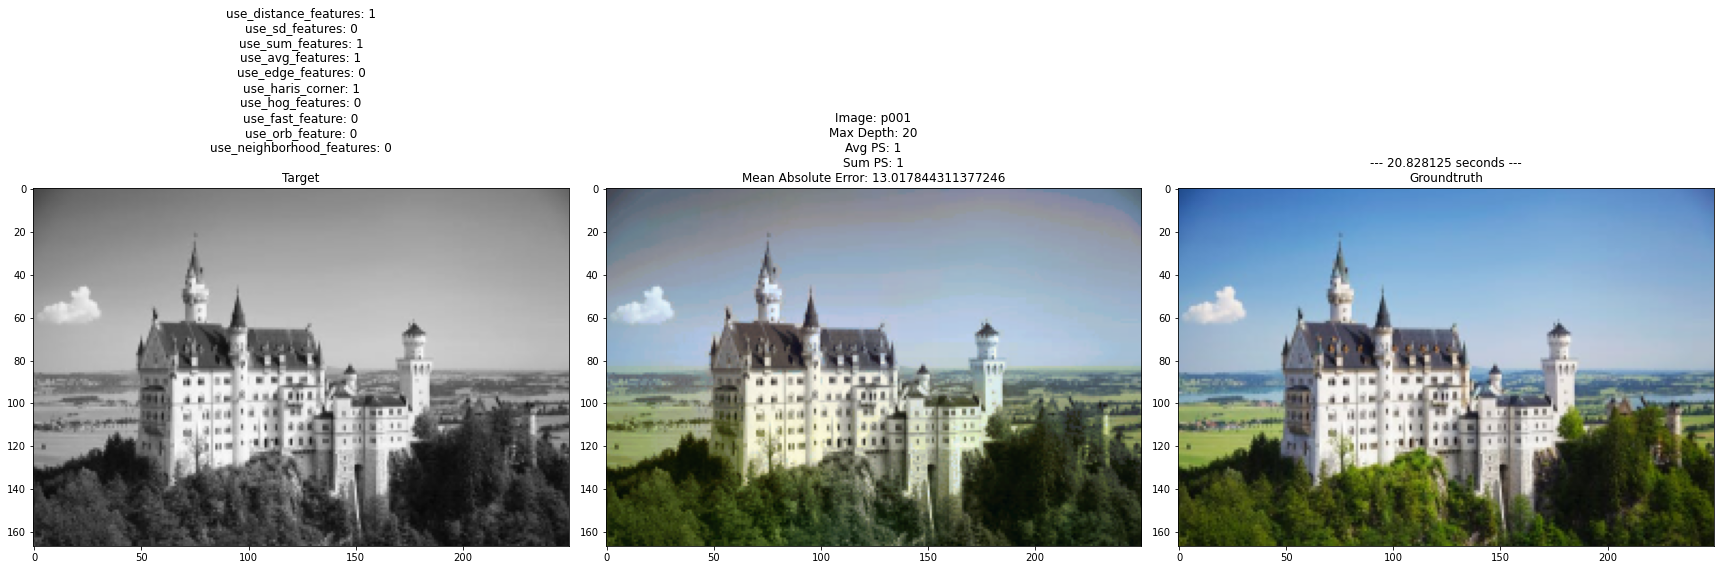

In [37]:
# Showing gray image, predicted image and ground truth image with a special format.
parameters = f'Image: {args.image_name}\nMax Depth: {args.max_depth}\nAvg PS: {args.avg_patch_size}\nSum PS: {args.sum_patch_size}'
parameters = parameters + f'\nMean Absolute Error: {float(mean_absolute_error(groundtruth_1d, reimage_1d))}'
payload = {
    f'{features}\nTarget': get_target(args.image_name),
    f'{parameters}': reimage,
    f'{"--- %s seconds ---" % (finish_time)}\nGroundtruth': groundtruth
}
show_image(payload, args.image_name, args.save_to_file)

In [38]:
# Writing the mean absolute errors to the excel file.
mae = mean_absolute_error(groundtruth_1d, reimage_1d)
write_data_to_excel(features,args.max_depth,args.avg_patch_size,args.sum_patch_size,mae,args.image_name,finish_time)

A2
A3
